# Hierarchical Clustering

## Dataset

### Layout

* Columns:
	* Customer ID
	* Genre
	* Age
	* Annual Income
	* Spending Score
* Rows: 100s of observations
	* Each row represents a customer from the mall
		* Features:
			* Genre
			* Age
			* Annual Income
			* Spending Score
		* Dependent variable:
			* Unknown

### Background

* Mall company data analysts collected data about their customers
* Mall company strategy team created customer spending score (1-100), which is based on how much a customer spends at the mall
	* Lower score = customer spends less
	* Higher score = customer spends more
* Data is based on customer spending over the last 1 year

### Goals

* Data analysts want to identify patterns within their customers
* Data analysts do not know what patterns to predict
* Build hierarchical clustering model to identify clusters of customer patterns

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

By default, since there are no dependent variables in the dataset, include all columns in the dataset.
However, one should exclude features that do not help in identifying patterns.

Only **Annual Income** and **Spending Score** columns are used as features:

* They can help identify patterns
* Are only used for learning purposes
* Visualization requires a 2-D plot so only 2 features are used, 1 feature per axis

Features excluded and why:

* **Customer ID**
    * Does not help identify patterns
* **Genre**
* **Age**
    * Each excluded only for learning purposes

The `y` dataset containing the dependent variables is not needed because the dataset contains no dependent variables.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Use Dendrogram to Find Optimal Number of Clusters

The SciPy library is used to create a dendrogram to determine the optimal number of clusters. It provides a simple `dendrogram` function that renders a visual dendrogram.

* `linkage` function performs hierarchical/agglomerative clustering
    * Parameters:
        * `features`: Matrix of features
        * `method`: Clustering technique
* In hierarchical clustering, the recommended method with the most relevant results and clusters, is the method of **Minimum Variance**
    * It is a technique that will result in having clusters where inside data points do not vary too much
    * Among all the clusters, the data points will have a low variance
    * The method of minimum variance consists of minimizing the variants in each of the clusters resulting from hierarchical clustering
    * The method argument for the `linkage` function to specify minimum variance is `ward`

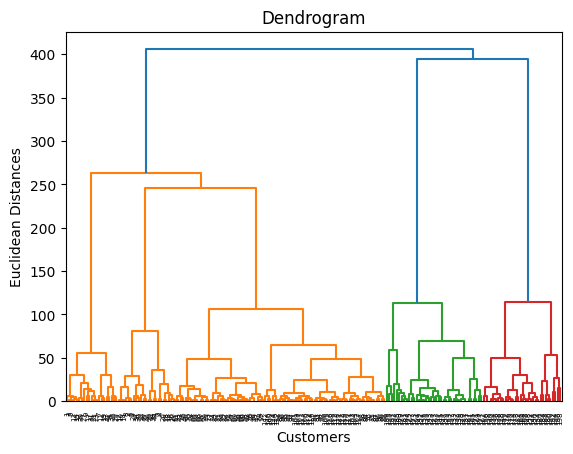

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

The optimal number of clusters is **5**.

* The **longest line is the orange line** 3rd from the left in the middle of the dendrogram plot
* The 3 long blue lines cross the blue horizontal line for the green and red grouped clusters so the optimal number of clusters cannot be 3

## Train Hierarchical Clustering Model on Dataset

* `AgglomerativeClustering` class from the Scikit Learn library implements the bottom up clustering approach for the agglomerative clustering type in hierarchical clustering
    * Parameters:
        * `n_clusters`: Optimal number of clusters
        * `metric`: Type of distance computed to measure variance within clusters. Use `euclidean` for calculating Euclidean distance.
        * `linkage`: Clustering type. Use `ward` for method of minimum variance.

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [10]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualize Clusters

Create a scatter plot of each cluster:

* Row index must specify all the customers for current cluster number: `y_hc == <cluster no.>`
* Index $0$ is the column index for **Annual Income** on x-axis
* Index $1$ is the column index for **Spending Score** on y-axis

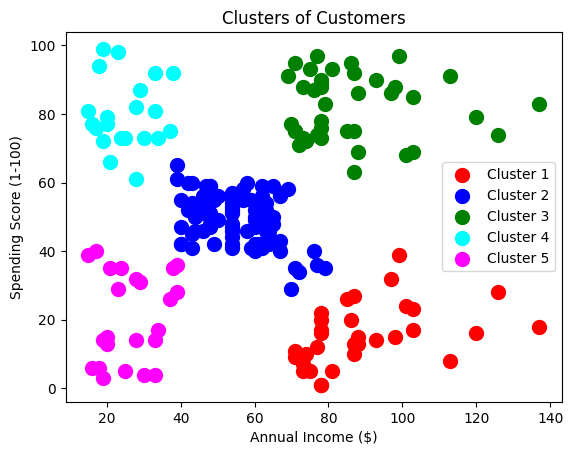

In [11]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, color = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, color = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, color = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Analysis

* **Cluster 5** = customers with low annual income and spending is low in the mall
* **Cluster 4** = customers with low annual income and spending is high in the mall
* **Cluster 3** = customers with high annual income and spending is high in the mall
* **Cluster 2** = customers with average annual income and spending is average in the mall
* **Cluster 1** = customers with high annual income and spending is low in the mall